In [1]:
import ee
import folium
import geehydro

In [2]:
ee.Authenticate()

Enter verification code: 4/1AY0e-g557WlY0PdiVPJ2_dD4-U_KYzh983WV7JOKx4VkoKGaLMH4DWM_Kr4

Successfully saved authorization token.


In [3]:
ee.Initialize()

In [4]:
Map = folium.Map(location=[39.7595014,-121.6218647], zoom_start=35)
#Map.setOptions("SATELLITE")
Map.setOptions("ROADMAP")


In [5]:
import io
from PIL import Image

img_data = Map._to_png(1)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("seg_model/junction_ref_table.csv")

In [8]:
df.head()

,junction_id,lat,lon,inc_edge_id,num_lanes,left_turn_pocket,right_turn_pocket,type,priority,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,86431158,39.80047,-121.580844,-10290588,1,0,0,2,NaN,NaN,NaN,NaN,NaN
1,86431158,39.80047,-121.580844,10290588,1,0,0,0,NaN,NaN,NaN,NaN,NaN
2,86431158,39.80047,-121.580844,-10295372,1,1,0,0,NaN,NaN,NaN,NaN,NaN
3,86431158,39.80047,-121.580844,10295372,1,0,0,0,NaN,NaN,NaN,NaN,NaN
4,86431158,39.80047,-121.580844,10293494#79,1,0,1,2,NaN,NaN,NaN,NaN,NaN


In [9]:
junc_set = set()
uniq_junc = set()
for junction in df.T.to_dict().values():
    junction_id = junction['junction_id']
    lat = float(junction['lat'])
    lon = float(junction['lon'])
    junc_set.add((junction_id, lat, lon))
    uniq_junc.add(junction_id)
print(len(junc_set),len(uniq_junc))


205 205


In [10]:
for junc, lat, lon in list(junc_set)[:10]:
    break # UNCOMMENT TO RUN
    Map = folium.Map(location=[lat,lon], zoom_start=30)
    Map.setOptions("ROADMAP")
    img_data = Map._to_png(1)
    f_name = "./roadmap/"+str(junc) + ".png"
    img = Image.open(io.BytesIO(img_data))
    img.save(f_name)

In [11]:
import cv2

def reshape(filename, c_fname):
    oriimage = cv2.imread(filename)
    print(oriimage.shape)
    ystart = (oriimage.shape[0]-416)//2
    yend = ystart+416

    xstart = (oriimage.shape[1]-416)//2
    xend= xstart + 416
    print(xstart, xend, ystart, yend)
    cropped = oriimage[ystart:yend, xstart:xend, :]
    print(cropped.shape)
    cv2.imwrite(c_fname, cropped)

In [12]:
import glob
import ntpath
for file in glob.glob(".\roadmap\*.png"):
    break # UNCOMMENT TO RUN
    head, tail = ntpath.split(file)
    reshape(file, head+"\c_"+tail)

### Extract roads from satellite image

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r".\roadmap\86513537.png")

lower_white = np.array([255, 255, 255], np.uint8)
upper_white = np.array([255, 255, 255], np.uint8)

mask_white = cv2.inRange(img, lower_white, upper_white)
img_res = cv2.bitwise_and(img, img, mask = mask_white)

# Taking a matrix of size 5 as the kernel 
kernel = np.ones((5,5), np.uint8) 
img_dilation = cv2.dilate(img_res, kernel, iterations=3) 

In [14]:
plt.rcParams['figure.figsize'] = [14, 10]

#### Original satellite image

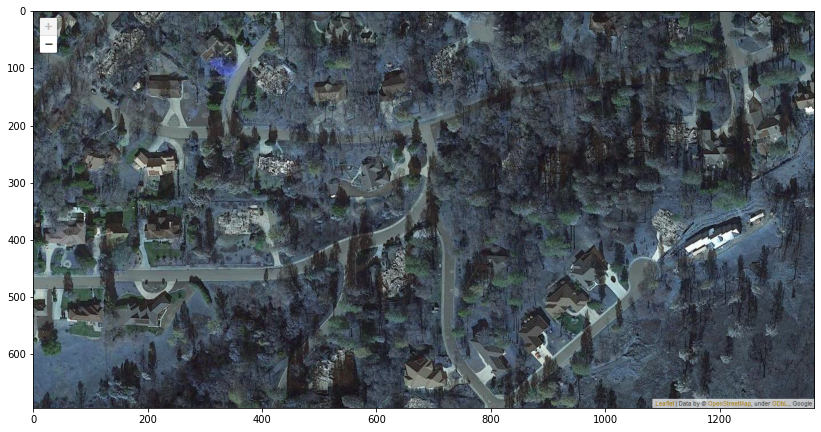

In [15]:
img_sat = cv2.imread(r".\del2\86513537.png")
plt.imshow(img_sat)

#### Google map view

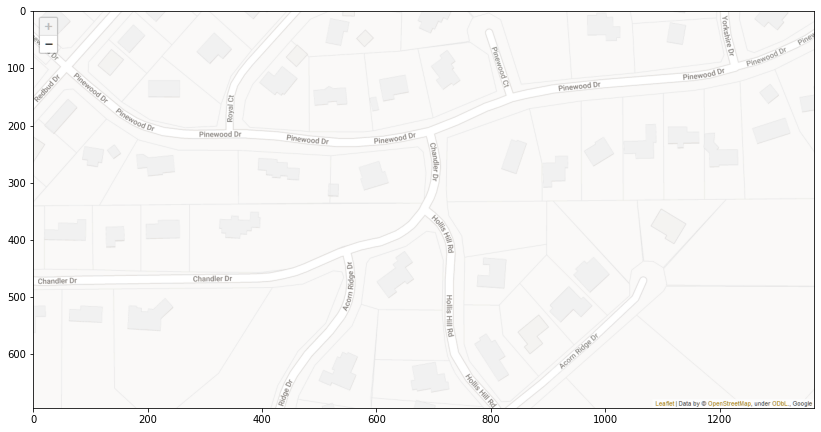

In [16]:
plt.imshow(img)

#### Extract roads (white pixels)

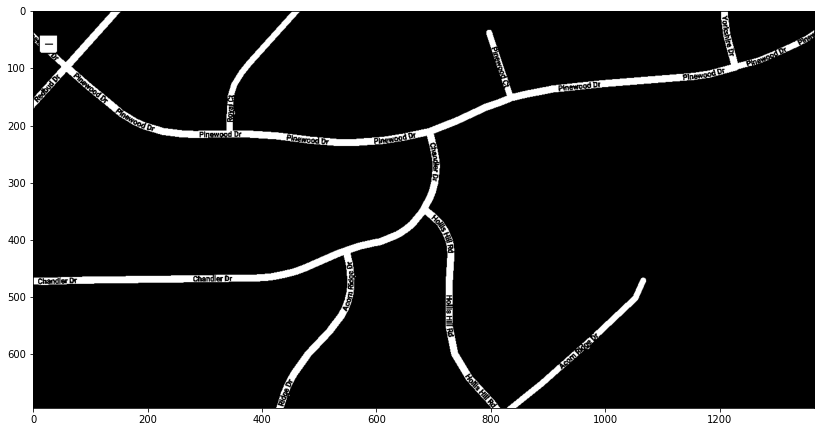

In [17]:
plt.imshow(img_res)

#### Dilate to remove the road names and widen road widths

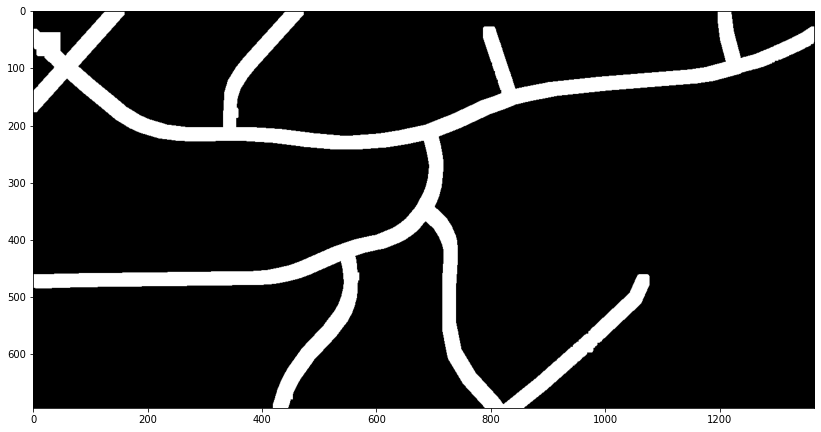

In [18]:
plt.imshow(img_dilation)   # this colormap will display in black / white

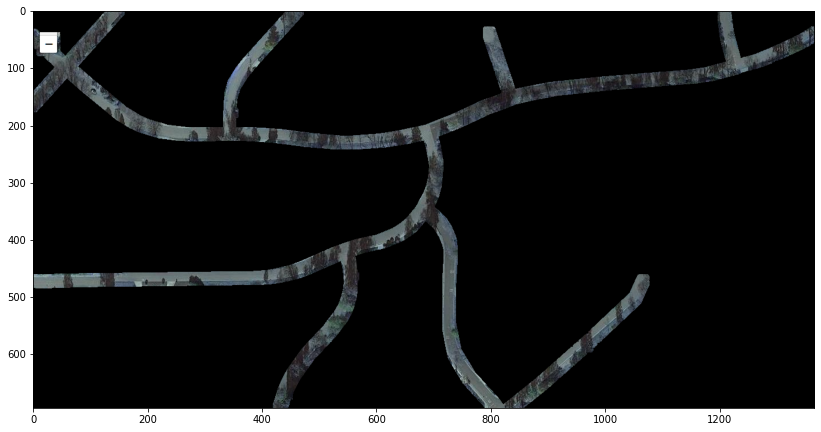

In [19]:
mask_white = cv2.inRange(img_dilation, lower_white, upper_white)
roads = cv2.bitwise_and(img_sat,img_sat,mask = mask_white)
plt.imshow(roads)